<a href="https://colab.research.google.com/github/ToHLz/Machine-learning/blob/main/Car_Insurance_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading data**

In [26]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
pd.set_option("display.max_columns", 101)

In [27]:
data = pd.read_csv("/content/Car_Insurance_Claims_rw.csv")
data.head()

,ID,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments,OUTCOME
0,569520.0,65+,female,majority,Dec,0-9y,high school,upper class,0.629027,1.0,after 2015,3 years,0.0,1.0,10238.0,12000.0,sedan,Policy Holder,Sport - Liability,External,more than 69000,3 to 4,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,none,1 year,none,0.0
1,750365.0,16-25,male,majority,Jan,0-9y,none,poverty,0.357757,0.0,before 2015,6 years,0.0,0.0,10238.0,16000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,Yes,more than 30,none,no change,none,1.0
2,199901.0,16-25,female,majority,Oct,0-9y,high school,working class,0.493146,1.0,before 2015,7 years,0.0,0.0,10238.0,11000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,1,no change,none,0.0
3,478866.0,16-25,male,majority,Jun,0-9y,university,working class,0.206013,1.0,before 2015,more than 7,0.0,1.0,32765.0,11000.0,sedan,Third Party,Sedan - Liability,External,20000 to 29000,1 vehicle,0.0,more than 30,Rural,No,0.0,0.0,Yes,more than 30,1,no change,more than 5,0.0
4,731664.0,26-39,male,majority,Jan,10-19y,none,working class,0.388366,1.0,before 2015,5 years,0.0,0.0,32765.0,12000.0,sedan,Third Party,Sport - Collision,External,more than 69000,1 vehicle,2.0,more than 30,Urban,No,0.0,1.0,No,more than 30,none,no change,none,1.0


# **EXPOLRATORY DATA ANALYSIS (EDA) and Data Cleaning**

In [28]:
#Explore columns
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'Month', 'DRIVING_EXPERIENCE',
       'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'AgeOfVehicle', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'Fault', 'PolicyType', 'AgentType',
       'VehiclePrice', 'NumberOfCars', 'SPEEDING_VIOLATIONS',
       'Days_Policy_Accident', 'AccidentArea', 'WitnessPresent', 'DUIS',
       'PAST_ACCIDENTS', 'PoliceReportFiled', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AddressChange_Claim', 'NumberOfSuppliments',
       'OUTCOME'],
      dtype='object')

In [29]:
#Checking the rows and columns contained in the dataset
data.shape

(15420, 34)

In [30]:
data = data.drop(['ID'], axis = 1)

In [31]:
# Describing the data
data.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [32]:
#Checking the data types
data.dtypes

AGE                      object
GENDER                   object
RACE                     object
Month                    object
DRIVING_EXPERIENCE       object
EDUCATION                object
INCOME                   object
CREDIT_SCORE            float64
VEHICLE_OWNERSHIP       float64
VEHICLE_YEAR             object
AgeOfVehicle             object
MARRIED                 float64
CHILDREN                float64
POSTAL_CODE             float64
ANNUAL_MILEAGE          float64
VEHICLE_TYPE             object
Fault                    object
PolicyType               object
AgentType                object
VehiclePrice             object
NumberOfCars             object
SPEEDING_VIOLATIONS     float64
Days_Policy_Accident     object
AccidentArea             object
WitnessPresent           object
DUIS                    float64
PAST_ACCIDENTS          float64
PoliceReportFiled        object
Days_Policy_Claim        object
PastNumberOfClaims       object
AddressChange_Claim      object
NumberOf

In [33]:
# Data engineering
data["AGE"].replace({"16-25": "Young", "26-39": "Middle Age","40-64":"Old","65+":"Very Old"}, inplace=True)
data["DRIVING_EXPERIENCE"].replace({"0-9y": "Beginner", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)
data["VEHICLE_YEAR"].replace({"before 2015": "before", "after 2015": "after"}, inplace=True)
data

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments,OUTCOME
0,Very Old,female,majority,Dec,Beginner,high school,upper class,0.629027,1.0,after,3 years,0.0,1.0,10238.0,12000.0,sedan,Policy Holder,Sport - Liability,External,more than 69000,3 to 4,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,none,1 year,none,0.0
1,Young,male,majority,Jan,Beginner,none,poverty,0.357757,0.0,before,6 years,0.0,0.0,10238.0,16000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,Yes,more than 30,none,no change,none,1.0
2,Young,female,majority,Oct,Beginner,high school,working class,0.493146,1.0,before,7 years,0.0,0.0,10238.0,11000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,1,no change,none,0.0
3,Young,male,majority,Jun,Beginner,university,working class,0.206013,1.0,before,more than 7,0.0,1.0,32765.0,11000.0,sedan,Third Party,Sedan - Liability,External,20000 to 29000,1 vehicle,0.0,more than 30,Rural,No,0.0,0.0,Yes,more than 30,1,no change,more than 5,0.0
4,Middle Age,male,majority,Jan,Amateur,none,working class,0.388366,1.0,before,5 years,0.0,0.0,32765.0,12000.0,sedan,Third Party,Sport - Collision,External,more than 69000,1 vehicle,2.0,more than 30,Urban,No,0.0,1.0,No,more than 30,none,no change,none,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,NaN,NaN,NaN,Nov,NaN,NaN,NaN,NaN,NaN,NaN,6 years,NaN,NaN,NaN,NaN,NaN,Policy Holder,Sedan - Collision,External,20000 to 29000,1 vehicle,NaN,more than 30,Urban,No,NaN,NaN,No,more than 30,2 to 4,no change,none,NaN
15416,NaN,NaN,NaN,Nov,NaN,NaN,NaN,NaN,NaN,NaN,6 years,NaN,NaN,NaN,NaN,NaN,Policy Holder,Sedan - Liability,External,30000 to 39000,3 to 4,NaN,more than 30,Urban,No,NaN,NaN,No,more than 30,more than 4,no change,more than 5,NaN
15417,NaN,NaN,NaN,Nov,NaN,NaN,NaN,NaN,NaN,NaN,5 years,NaN,NaN,NaN,NaN,NaN,Policy Holder,Sedan - Collision,External,20000 to 29000,1 vehicle,NaN,more than 30,Rural,No,NaN,NaN,No,more than 30,more than 4,no change,1 to 2,NaN
15418,NaN,NaN,NaN,Dec,NaN,NaN,NaN,NaN,NaN,NaN,2 years,NaN,NaN,NaN,NaN,NaN,Third Party,Sedan - All Perils,External,20000 to 29000,1 vehicle,NaN,more than 30,Urban,No,NaN,NaN,No,more than 30,none,no change,more than 5,NaN


In [34]:
#Finding features with null data
data.isna().sum()

AGE                     5420
GENDER                  5420
RACE                    5420
Month                      0
DRIVING_EXPERIENCE      5420
EDUCATION               5420
INCOME                  5420
CREDIT_SCORE            6402
VEHICLE_OWNERSHIP       5420
VEHICLE_YEAR            5420
AgeOfVehicle               0
MARRIED                 5420
CHILDREN                5420
POSTAL_CODE             5420
ANNUAL_MILEAGE          6377
VEHICLE_TYPE            5420
Fault                      0
PolicyType                 0
AgentType                  0
VehiclePrice               0
NumberOfCars               0
SPEEDING_VIOLATIONS     5420
Days_Policy_Accident       0
AccidentArea               0
WitnessPresent             0
DUIS                    5420
PAST_ACCIDENTS          5420
PoliceReportFiled          0
Days_Policy_Claim          0
PastNumberOfClaims         0
AddressChange_Claim        0
NumberOfSuppliments        0
OUTCOME                 5420
dtype: int64

In [35]:
# Replacing the null/missing values with the most frequent value
data = data.fillna(data.mode().iloc[0])
data.head()

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments,OUTCOME
0,Very Old,female,majority,Dec,Beginner,high school,upper class,0.629027,1.0,after,3 years,0.0,1.0,10238.0,12000.0,sedan,Policy Holder,Sport - Liability,External,more than 69000,3 to 4,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,none,1 year,none,0.0
1,Young,male,majority,Jan,Beginner,none,poverty,0.357757,0.0,before,6 years,0.0,0.0,10238.0,16000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,Yes,more than 30,none,no change,none,1.0
2,Young,female,majority,Oct,Beginner,high school,working class,0.493146,1.0,before,7 years,0.0,0.0,10238.0,11000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,1,no change,none,0.0
3,Young,male,majority,Jun,Beginner,university,working class,0.206013,1.0,before,more than 7,0.0,1.0,32765.0,11000.0,sedan,Third Party,Sedan - Liability,External,20000 to 29000,1 vehicle,0.0,more than 30,Rural,No,0.0,0.0,Yes,more than 30,1,no change,more than 5,0.0
4,Middle Age,male,majority,Jan,Amateur,none,working class,0.388366,1.0,before,5 years,0.0,0.0,32765.0,12000.0,sedan,Third Party,Sport - Collision,External,more than 69000,1 vehicle,2.0,more than 30,Urban,No,0.0,1.0,No,more than 30,none,no change,none,1.0


In [36]:
#Finding features with null data
data.isna().sum()

AGE                     0
GENDER                  0
RACE                    0
Month                   0
DRIVING_EXPERIENCE      0
EDUCATION               0
INCOME                  0
CREDIT_SCORE            0
VEHICLE_OWNERSHIP       0
VEHICLE_YEAR            0
AgeOfVehicle            0
MARRIED                 0
CHILDREN                0
POSTAL_CODE             0
ANNUAL_MILEAGE          0
VEHICLE_TYPE            0
Fault                   0
PolicyType              0
AgentType               0
VehiclePrice            0
NumberOfCars            0
SPEEDING_VIOLATIONS     0
Days_Policy_Accident    0
AccidentArea            0
WitnessPresent          0
DUIS                    0
PAST_ACCIDENTS          0
PoliceReportFiled       0
Days_Policy_Claim       0
PastNumberOfClaims      0
AddressChange_Claim     0
NumberOfSuppliments     0
OUTCOME                 0
dtype: int64

In [37]:
data.head()

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments,OUTCOME
0,Very Old,female,majority,Dec,Beginner,high school,upper class,0.629027,1.0,after,3 years,0.0,1.0,10238.0,12000.0,sedan,Policy Holder,Sport - Liability,External,more than 69000,3 to 4,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,none,1 year,none,0.0
1,Young,male,majority,Jan,Beginner,none,poverty,0.357757,0.0,before,6 years,0.0,0.0,10238.0,16000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,Yes,more than 30,none,no change,none,1.0
2,Young,female,majority,Oct,Beginner,high school,working class,0.493146,1.0,before,7 years,0.0,0.0,10238.0,11000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,1,no change,none,0.0
3,Young,male,majority,Jun,Beginner,university,working class,0.206013,1.0,before,more than 7,0.0,1.0,32765.0,11000.0,sedan,Third Party,Sedan - Liability,External,20000 to 29000,1 vehicle,0.0,more than 30,Rural,No,0.0,0.0,Yes,more than 30,1,no change,more than 5,0.0
4,Middle Age,male,majority,Jan,Amateur,none,working class,0.388366,1.0,before,5 years,0.0,0.0,32765.0,12000.0,sedan,Third Party,Sport - Collision,External,more than 69000,1 vehicle,2.0,more than 30,Urban,No,0.0,1.0,No,more than 30,none,no change,none,1.0


## **Normality of the dataset**

# **Checking if our dataset is balanced or not**

In [38]:
# Checking if our dataset is balanced or not, where 0 = non-fraudulent transactions and 1 = fraudulent transactions
data['OUTCOME'].value_counts()

0.0    12287
1.0     3133
Name: OUTCOME, dtype: int64

From the pie chart above, approximately 20% data is reported as fraud.

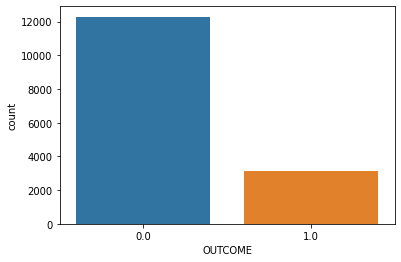

In [39]:
# Checking if our dataset is balanced or not, where 0 = non-fraudulent transactions and 1 = fraudulent transactions
sns.countplot(data['OUTCOME'])

From the values and plot above, we can infer that our dataset is unbalanced because we are having 122287 non-fraudulent transactions and 3133 fradulent transactions. Our models when trained on this data will give 99% accuracy because it will simply predict non-fraudulent every time and it will therefore be proven as a vey bad model. That is why to tackle this, we need to balance our dataset.

In [40]:
# Balancing our dataset with Random undersampling
non_fraud = data[data['OUTCOME']==0]
fraud = data[data['OUTCOME']==1]
non_fraud = non_fraud.sample(frac=1)
non_fraud = non_fraud[:3133]
new_data = pd.concat([non_fraud,fraud])
new_data = new_data.sample(frac=1)

The code above means that:

Line 1 – Taking out all the non_fraud transactions from our dataset.

Line 2 – Taking out all the fraud transactions from our dataset.

Line 3 – df.sample is used to randomly take out some fraction of data from the data frame. Here we are using frac=1 means take out 100% of data. This step simply helps in shuffling the data.

Line 4 – After shuffling just take the first 3133 instances/transactions of non_fraud because we have only 3133 transactions of fraud. That’s why to exactly balance the data we are doing this step.

Line 5-6 – Join both datasets and name it new_df and shuffle it again.

In [41]:
# Checking to see if our dataset is now balanced
new_data['OUTCOME'].value_counts()

1.0    3133
0.0    3133
Name: OUTCOME, dtype: int64

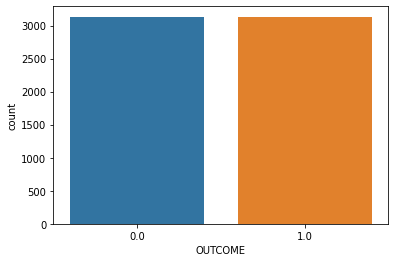

In [42]:
# Checking to see if our dataset is now balanced
sns.countplot(new_data['OUTCOME'])

We used Random undersampling to balance our dataset, although this method may have achieved our aim which is balancing dataset, we may have lost some valuable information. Random oversampling on the other hand could cause overfitting and poor generalization in my test set, so instead, we are going to use Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset

# **SMOTE**

In [43]:
X = data.iloc[:,:-1]
y = data.OUTCOME
X.head()

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments
0,Very Old,female,majority,Dec,Beginner,high school,upper class,0.629027,1.0,after,3 years,0.0,1.0,10238.0,12000.0,sedan,Policy Holder,Sport - Liability,External,more than 69000,3 to 4,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,none,1 year,none
1,Young,male,majority,Jan,Beginner,none,poverty,0.357757,0.0,before,6 years,0.0,0.0,10238.0,16000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,Yes,more than 30,none,no change,none
2,Young,female,majority,Oct,Beginner,high school,working class,0.493146,1.0,before,7 years,0.0,0.0,10238.0,11000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,1,no change,none
3,Young,male,majority,Jun,Beginner,university,working class,0.206013,1.0,before,more than 7,0.0,1.0,32765.0,11000.0,sedan,Third Party,Sedan - Liability,External,20000 to 29000,1 vehicle,0.0,more than 30,Rural,No,0.0,0.0,Yes,more than 30,1,no change,more than 5
4,Middle Age,male,majority,Jan,Amateur,none,working class,0.388366,1.0,before,5 years,0.0,0.0,32765.0,12000.0,sedan,Third Party,Sport - Collision,External,more than 69000,1 vehicle,2.0,more than 30,Urban,No,0.0,1.0,No,more than 30,none,no change,none


In [44]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['AGE', 'GENDER', 'RACE', 'Month', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'AgeOfVehicle', 'VEHICLE_TYPE', 'Fault', 'PolicyType', 'AgentType', 'VehiclePrice', 'NumberOfCars', 'Days_Policy_Accident', 'AccidentArea', 'WitnessPresent', 'PoliceReportFiled', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AddressChange_Claim', 'NumberOfSuppliments']] = \
X.loc[:,['AGE', 'GENDER', 'RACE', 'Month', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'AgeOfVehicle', 'VEHICLE_TYPE', 'Fault', 'PolicyType', 'AgentType', 'VehiclePrice', 'NumberOfCars', 'Days_Policy_Accident', 'AccidentArea', 'WitnessPresent', 'PoliceReportFiled', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AddressChange_Claim', 'NumberOfSuppliments']].apply(enc.fit_transform)
X.head()

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments
0,2,0,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,0,0,5,0,5,2,0.0,3,1,0,0.0,0.0,0,2,3,0,3
1,3,1,0,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,0,0,4,0,5,0,0.0,3,1,0,0.0,0.0,1,2,3,3,3
2,3,0,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,0,0,4,0,5,0,0.0,3,1,0,0.0,0.0,0,2,0,3,3
3,3,1,0,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,0,1,2,0,0,0,0.0,3,0,0,0.0,0.0,1,2,0,3,2
4,0,1,0,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,0,1,4,0,5,0,2.0,3,1,0,0.0,1.0,0,2,3,3,3


In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 12287, 1.0: 3133})
Resample dataset shape Counter({0.0: 12287, 1.0: 12287})


# **FEATURES SELECTION**

# **Embedded Method Tree Based Feature Selection**

In [46]:
from sklearn.ensemble import RandomForestClassifier
# import the RFE from skleaarn library
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [47]:
data.head()

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments,OUTCOME
0,Very Old,female,majority,Dec,Beginner,high school,upper class,0.629027,1.0,after,3 years,0.0,1.0,10238.0,12000.0,sedan,Policy Holder,Sport - Liability,External,more than 69000,3 to 4,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,none,1 year,none,0.0
1,Young,male,majority,Jan,Beginner,none,poverty,0.357757,0.0,before,6 years,0.0,0.0,10238.0,16000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,Yes,more than 30,none,no change,none,1.0
2,Young,female,majority,Oct,Beginner,high school,working class,0.493146,1.0,before,7 years,0.0,0.0,10238.0,11000.0,sedan,Policy Holder,Sport - Collision,External,more than 69000,1 vehicle,0.0,more than 30,Urban,No,0.0,0.0,No,more than 30,1,no change,none,0.0
3,Young,male,majority,Jun,Beginner,university,working class,0.206013,1.0,before,more than 7,0.0,1.0,32765.0,11000.0,sedan,Third Party,Sedan - Liability,External,20000 to 29000,1 vehicle,0.0,more than 30,Rural,No,0.0,0.0,Yes,more than 30,1,no change,more than 5,0.0
4,Middle Age,male,majority,Jan,Amateur,none,working class,0.388366,1.0,before,5 years,0.0,0.0,32765.0,12000.0,sedan,Third Party,Sport - Collision,External,more than 69000,1 vehicle,2.0,more than 30,Urban,No,0.0,1.0,No,more than 30,none,no change,none,1.0


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
  if data[column].dtype == 'object':
    data[column] = le.fit_transform(data[column])

In [49]:
X = data.iloc[:,0:-1]
y = data["OUTCOME"]

In [50]:
X.shape, y.shape

((15420, 32), (15420,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size=0.30)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10794, 32)
(4626, 32)
(10794,)
(4626,)


In [53]:
# Without feature selection check accuracy with Random forest
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rf_w)

0.8834846519671422

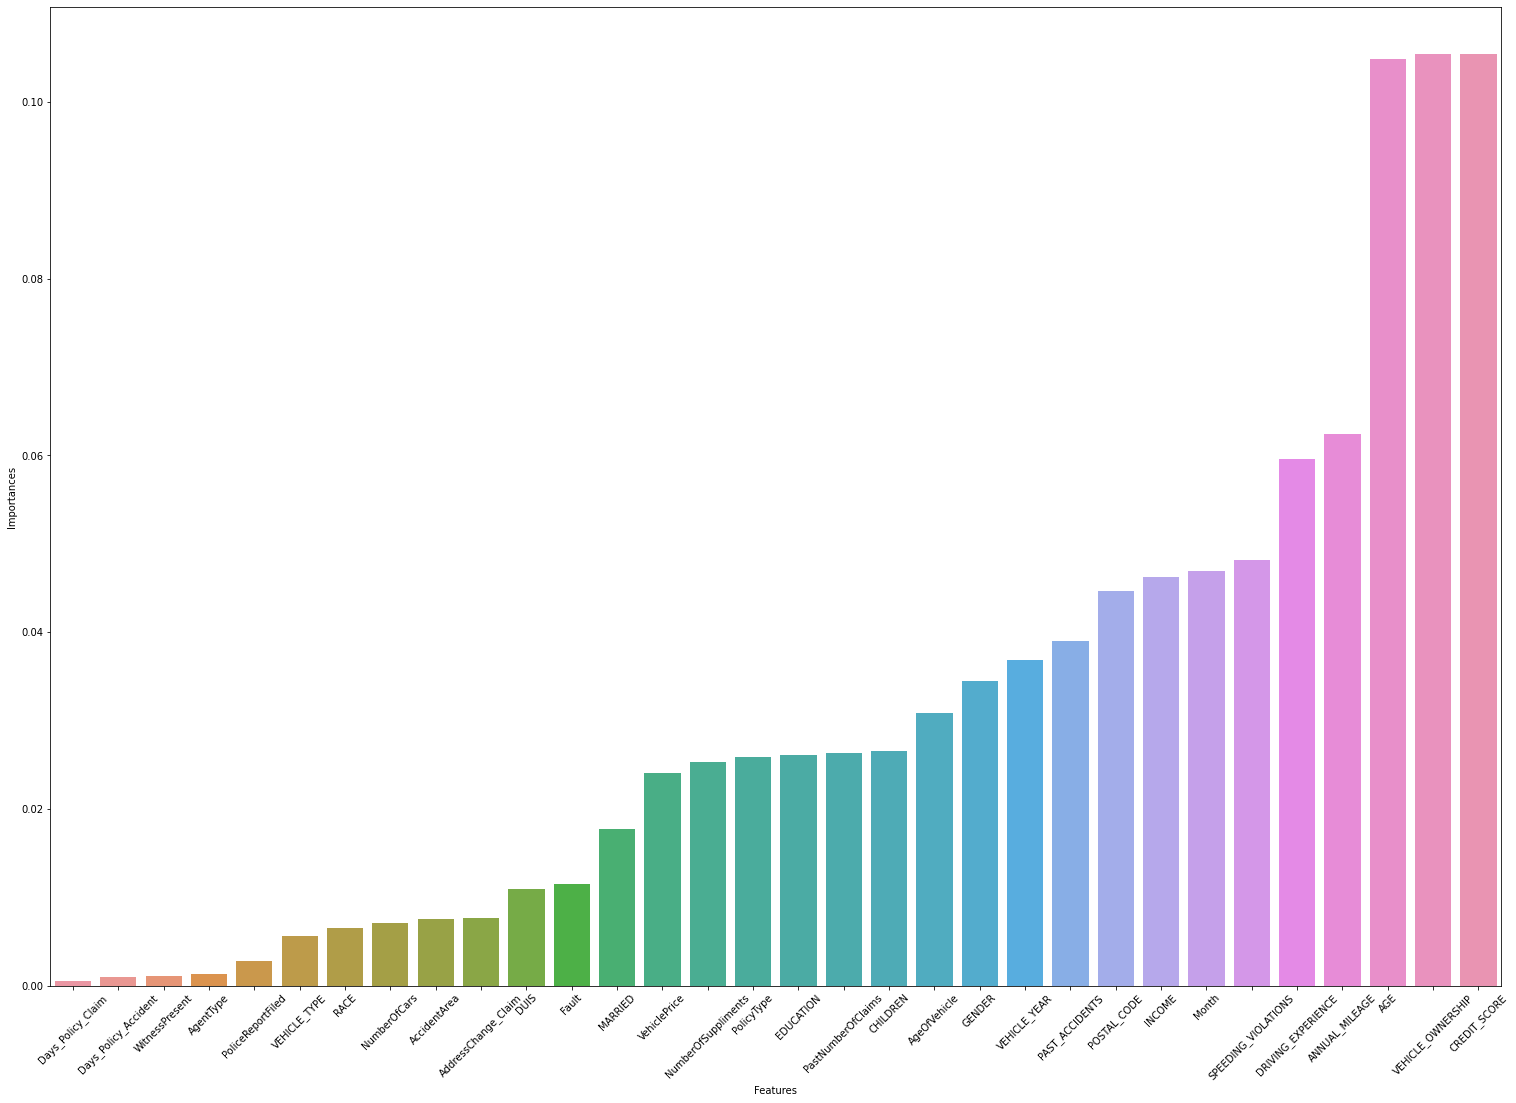

In [54]:
# Now with feature selection
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a dataframe for visualization
final_df = pd.DataFrame({"Features": X_train.columns, "Importances": importances})
final_df.set_index('Importances')

# sort in ascending order to better visualize it.
final_df = final_df.sort_values('Importances')

# plot the features importances in bars.
plt.figure(figsize=(26,18))
plt.xticks(rotation=45)
sns.barplot(x="Features", y="Importances", data=final_df)

In [55]:
from scipy.sparse.construct import random
# with feature selection, check accuracy with Random Forest
# the following will show how to retrieve the 20 most informative features
model_tree = RandomForestClassifier(n_estimators=100, random_state=42)

# using RFE to eliminate the less important features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=20, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

#Reduce X to the selected features and then predict using the predict
y_pred_rf = sel_rfe_tree.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rf)

[ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True False  True False False
 False False  True False False  True False  True]
[ 1  1  7  1  1  1  1  1  1  1  1  1  1  1  1  8  2  1 10  1  6  1 11  5
 12  3  1  9 13  1  4  1]


0.8895373973194984

True and 1 means values which are most significant or values with the highest importance that were selected

In [56]:
# we are going to now see the features that were selected
selected_cols = [column for column in X_train.columns if column in X_train.columns[sel_rfe_tree.get_support()]]
selected_cols

['AGE',
 'GENDER',
 'Month',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'AgeOfVehicle',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'PolicyType',
 'VehiclePrice',
 'SPEEDING_VIOLATIONS',
 'PAST_ACCIDENTS',
 'PastNumberOfClaims',
 'NumberOfSuppliments']

These are the features that was selected by the RF algorithm to be the features with the highest importance. So out of all the columns belows, the 20 features above were the ones selected

In [57]:
X_train.columns

Index(['AGE', 'GENDER', 'RACE', 'Month', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'AgeOfVehicle', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'VEHICLE_TYPE', 'Fault', 'PolicyType', 'AgentType', 'VehiclePrice',
       'NumberOfCars', 'SPEEDING_VIOLATIONS', 'Days_Policy_Accident',
       'AccidentArea', 'WitnessPresent', 'DUIS', 'PAST_ACCIDENTS',
       'PoliceReportFiled', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AddressChange_Claim', 'NumberOfSuppliments'],
      dtype='object')

# **Feature Selection using ANOVA(Analysis of Variance) or F-Test**

In [58]:
from scipy import stats
import math

In [59]:
data.head()

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments,OUTCOME
0,2,0,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,0,0,5,0,5,2,0.0,3,1,0,0.0,0.0,0,2,3,0,3,0.0
1,3,1,0,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,0,0,4,0,5,0,0.0,3,1,0,0.0,0.0,1,2,3,3,3,1.0
2,3,0,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,0,0,4,0,5,0,0.0,3,1,0,0.0,0.0,0,2,0,3,3,0.0
3,3,1,0,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,0,1,2,0,0,0,0.0,3,0,0,0.0,0.0,1,2,0,3,2,0.0
4,0,1,0,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,0,1,4,0,5,0,2.0,3,1,0,0.0,1.0,0,2,3,3,3,1.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AGE                   15420 non-null  int64  
 1   GENDER                15420 non-null  int64  
 2   RACE                  15420 non-null  int64  
 3   Month                 15420 non-null  int64  
 4   DRIVING_EXPERIENCE    15420 non-null  int64  
 5   EDUCATION             15420 non-null  int64  
 6   INCOME                15420 non-null  int64  
 7   CREDIT_SCORE          15420 non-null  float64
 8   VEHICLE_OWNERSHIP     15420 non-null  float64
 9   VEHICLE_YEAR          15420 non-null  int64  
 10  AgeOfVehicle          15420 non-null  int64  
 11  MARRIED               15420 non-null  float64
 12  CHILDREN              15420 non-null  float64
 13  POSTAL_CODE           15420 non-null  float64
 14  ANNUAL_MILEAGE        15420 non-null  float64
 15  VEHICLE_TYPE       

In [61]:
X = data.iloc[:,0:-1]
X.head(1)

,AGE,GENDER,RACE,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,Fault,PolicyType,AgentType,VehiclePrice,NumberOfCars,SPEEDING_VIOLATIONS,Days_Policy_Accident,AccidentArea,WitnessPresent,DUIS,PAST_ACCIDENTS,PoliceReportFiled,Days_Policy_Claim,PastNumberOfClaims,AddressChange_Claim,NumberOfSuppliments
0,2,0,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,0,0,5,0,5,2,0.0,3,1,0,0.0,0.0,0,2,3,0,3


In [62]:
y = data['OUTCOME']

In [63]:
# Define feature selection
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(score_func=f_classif, k=20)

In [64]:
# Apply feature selection
fs.fit(X,y)

SelectKBest(k=20)

In [65]:
# True = Top 20 columns as we mentioned k = 20
# False = All the remaining columns except k =20
fs.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True])

In [66]:
# Total sum of the True
fs.get_support().sum()

20

In [67]:
def list_ceil(x):
  return [math.ceil(i) for i in x]

In [68]:
print("P_Values :")
print(np.round(fs.pvalues_,19))
print("F Values :")
print(fs.scores_)

P_Values :
[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.38200942e-01
 1.81300000e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.86041012e-01 1.12454888e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.83332958e-11
 2.86618714e-01 7.06255188e-01 7.51108364e-01 9.93913640e-01
 7.40055202e-01 0.00000000e+00 5.05933754e-01 5.68803197e-01
 3.74531247e-01 0.00000000e+00 0.00000000e+00 2.75017861e-01
 7.72620922e-01 9.59147200e-01 3.13060508e-01 1.46558581e-01]
F Values :
[2.60812769e+03 1.26098219e+03 9.72035421e+01 6.01020163e-01
 6.79472323e+01 2.61295972e+02 2.88181868e+02 4.90768673e+02
 4.20625821e+03 2.21093428e+02 2.05400135e-02 6.42765342e+00
 1.99408439e+03 5.94037081e+02 7.31318269e+02 4.52087583e+01
 1.13551501e+00 1.42051501e-01 1.00605624e-01 5.81912450e-05
 1.10082094e-01 2.12202093e+02 4.42488495e-01 3.24703056e-01
 7.88621121e-01 9.50333242e+01 3.02212724e+02 1.19163104e+00
 8.34940681e-02 2.62396132e-03 1.01778632e+00 2.10792151e+00]


In [69]:
list_ceil(fs.scores_)

[2609,
 1261,
 98,
 1,
 68,
 262,
 289,
 491,
 4207,
 222,
 1,
 7,
 1995,
 595,
 732,
 46,
 2,
 1,
 1,
 1,
 1,
 213,
 1,
 1,
 1,
 96,
 303,
 2,
 1,
 1,
 2,
 3]

In [70]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_, 19))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features, features_score, features_pvalue], axis=1)

# Assign the column name
feature_score.columns = ["Input_Features", "Score", "p_Value"]
print(feature_score.nlargest(20, columns="Score"))

         Input_Features        Score       p_Value
8     VEHICLE_OWNERSHIP  4206.258214  0.000000e+00
0                   AGE  2608.127695  0.000000e+00
12             CHILDREN  1994.084385  0.000000e+00
1                GENDER  1260.982188  0.000000e+00
14       ANNUAL_MILEAGE   731.318269  0.000000e+00
13          POSTAL_CODE   594.037081  0.000000e+00
7          CREDIT_SCORE   490.768673  0.000000e+00
26       PAST_ACCIDENTS   302.212724  0.000000e+00
6                INCOME   288.181868  0.000000e+00
5             EDUCATION   261.295972  0.000000e+00
9          VEHICLE_YEAR   221.093428  0.000000e+00
21  SPEEDING_VIOLATIONS   212.202093  0.000000e+00
2                  RACE    97.203542  0.000000e+00
25                 DUIS    95.033324  0.000000e+00
4    DRIVING_EXPERIENCE    67.947232  1.813000e-16
15         VEHICLE_TYPE    45.208758  1.833330e-11
11              MARRIED     6.427653  1.124549e-02
31  NumberOfSuppliments     2.107922  1.465586e-01
27    PoliceReportFiled     1.1

Having performed both ANOVA and Embedded tree based feature selection, we can see that both methods chose similar features. 

## **ANOVA** selected the following:

VEHICLE_OWNERSHIP  

AGE

CHILDREN

GENDER

ANNUAL_MILEAGE

POSTAL_CODE   

CREDIT_SCORE   

PAST_ACCIDENTS   

INCOME   

EDUCATION   

VEHICLE_YEAR   

SPEEDING_VIOLATIONS   

RACE    

DUIS    

DRIVING_EXPERIENCE    

VEHICLE_TYPE    

MARRIED    

NumberOfSuppliments    

PoliceReportFiled     

Fault 

## **While Embedded tree based feature selection selected the following**

'AGE',

'GENDER',

'Month',

'DRIVING_EXPERIENCE',

'EDUCATION',

'INCOME',

'CREDIT_SCORE',

'VEHICLE_OWNERSHIP',

'VEHICLE_YEAR',

'AgeOfVehicle',

'MARRIED',

'CHILDREN',

'POSTAL_CODE',

'ANNUAL_MILEAGE',

'PolicyType',

'VehiclePrice',

'SPEEDING_VIOLATIONS',

'PAST_ACCIDENTS',

'PastNumberOfClaims',

'NumberOfSuppliments'


However, we are going to use the features selected by the Embedded tree based feature selection technique to train and test our various models, and drop the other features accordingly.

In [71]:
# dropping other features that were not selected
data1 = data.drop(['RACE', 'VEHICLE_TYPE', 'Fault', 'AgentType', 
                   'NumberOfCars', 'Days_Policy_Accident', 'AccidentArea',
                   'WitnessPresent', 'DUIS', 'PoliceReportFiled', 'Days_Policy_Claim', 
                   'AddressChange_Claim'], axis = 1)

In [72]:
data1.head()

,AGE,GENDER,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PolicyType,VehiclePrice,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,PastNumberOfClaims,NumberOfSuppliments,OUTCOME
0,2,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,5,5,0.0,0.0,3,3,0.0
1,3,1,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,4,5,0.0,0.0,3,3,1.0
2,3,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,4,5,0.0,0.0,0,3,0.0
3,3,1,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,2,0,0.0,0.0,0,2,0.0
4,0,1,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,4,5,2.0,1.0,3,3,1.0


# **MODEL TRAINING AND TESTING**

## **LOGISTIC REGRESSION**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report,auc,average_precision_score,f1_score
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_auc_score
from sklearn import metrics

In [74]:
# creating X and y
X = data1.drop('OUTCOME',axis=1)
y = data1['OUTCOME']

# train-test-split our data for Insurance Fraud Detection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

**Splitting our data in 70%-30% proportion for training and testing purpose respectively.**

**Training our LogisticRegresion model for Insurance Fraud Detection.**

In [75]:
# Using Logistic regression for Binary Classification
scaler = StandardScaler()
lr = LogisticRegression(solver = 'lbfgs')
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])


model1.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [76]:
# Accuracy for Train Split
y_train_h = model1.predict(X_train)
y_train_h_probs = model1.predict_proba(X_train)[:,1]

train_accuracy = accuracy_score(y_train, y_train_h)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_h))

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[8118  451]
 [ 850 1375]]
Training accuracy: 87.9470 %


In [77]:
# Accuracy for Test Split
y_test_h = model1.predict(X_test)
y_test_h_probs = model1.predict_proba(X_test)[:,1]

test_accuracy = accuracy_score(y_test, y_test_h)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_h))

print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix:
 [[3501  217]
 [ 327  581]]
Testing accuracy: 88.2404 %


In [78]:
print(classification_report(y_test, y_test_h, digits=5))

              precision    recall  f1-score   support

         0.0    0.91458   0.94164   0.92791      3718
         1.0    0.72807   0.63987   0.68113       908

    accuracy                        0.88240      4626
   macro avg    0.82132   0.79075   0.80452      4626
weighted avg    0.87797   0.88240   0.87947      4626



# **XGBoost**

In [79]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [80]:
X = data1.drop('OUTCOME', axis=1).copy()
y - data1['OUTCOME'].copy()
X.head()

,AGE,GENDER,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PolicyType,VehiclePrice,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,PastNumberOfClaims,NumberOfSuppliments
0,2,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,5,5,0.0,0.0,3,3
1,3,1,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,4,5,0.0,0.0,3,3
2,3,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,4,5,0.0,0.0,0,3
3,3,1,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,2,0,0.0,0.0,0,2
4,0,1,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,4,5,2.0,1.0,3,3


In [81]:
# train-test-split our data for Insurance Fraud Detection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [82]:
# the early stopping is for when the predictions does not improve, XGBoost will build 10 more trees as stated in the code and if after the 10 tress, the predictions still doesn't improve, then XGBoost will stop.
# aucpr is to evaluate how well the predictions are being made
# the model is training on the train dataset, but it is evaluating how many trees it should build using the test dataset.
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)]) 

[0]	validation_0-aucpr:0.718387
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.718387
[2]	validation_0-aucpr:0.718387
[3]	validation_0-aucpr:0.7218
[4]	validation_0-aucpr:0.737994
[5]	validation_0-aucpr:0.742325
[6]	validation_0-aucpr:0.747268
[7]	validation_0-aucpr:0.753531
[8]	validation_0-aucpr:0.756186
[9]	validation_0-aucpr:0.759759
[10]	validation_0-aucpr:0.763955
[11]	validation_0-aucpr:0.771804
[12]	validation_0-aucpr:0.772906
[13]	validation_0-aucpr:0.777755
[14]	validation_0-aucpr:0.782333
[15]	validation_0-aucpr:0.788883
[16]	validation_0-aucpr:0.791002
[17]	validation_0-aucpr:0.793574
[18]	validation_0-aucpr:0.794787
[19]	validation_0-aucpr:0.796763
[20]	validation_0-aucpr:0.797077
[21]	validation_0-aucpr:0.798449
[22]	validation_0-aucpr:0.801458
[23]	validation_0-aucpr:0.801923
[24]	validation_0-aucpr:0.802868
[25]	validation_0-aucpr:0.804218
[26]	validation_0-aucpr:0.805125
[27]	validation_0-aucpr:0.806037
[28]	validation_0-aucp

XGBClassifier(seed=42)

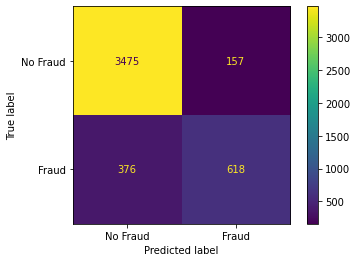

In [83]:
# we have built an XGBoost model for classification. Let's see how it performs on the Testing Dataset
# by running the Testing Dataset down the model and drawing a Confusion Matrix
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=["No Fraud", "Fraud"])

In the confusion matrix, we see that the top row represents transactions that are not fraudulent and there are 3,632 transactions in this row and of those, 3,475(96%) were correctly classified.

However, the second row, these are the transactions that are fraudulent and there are 994 transactions in this row and we see in the bottom right corner that only 618(62%) were correctly classified.

### **Optimize Parameters using cross validation and GridSearch()**

In [84]:
# Round 1
param_grid ={
    'max_depth': [3,4,5],
    'learining_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
}

# Round 2
param_grid ={
    'max_depth': [4],
    'learining_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10.0, 20, 100],
}

In [85]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3                        
)

optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)

print(optimal_params.best_params_)

{'gamma': 0.25, 'learining_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0}


In [86]:
from math import gamma
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            seed=42,
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=10.0,
                            subsample=0.9,
                            colsample_bytree=0.5)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10, 
            eval_metric='aucpr', 
            eval_set=[(X_test, y_test)]) 

[0]	validation_0-aucpr:0.711924
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.743074
[2]	validation_0-aucpr:0.762096
[3]	validation_0-aucpr:0.78101
[4]	validation_0-aucpr:0.777609
[5]	validation_0-aucpr:0.775201
[6]	validation_0-aucpr:0.781007
[7]	validation_0-aucpr:0.786849
[8]	validation_0-aucpr:0.784125
[9]	validation_0-aucpr:0.790209
[10]	validation_0-aucpr:0.79
[11]	validation_0-aucpr:0.789363
[12]	validation_0-aucpr:0.790263
[13]	validation_0-aucpr:0.789869
[14]	validation_0-aucpr:0.795919
[15]	validation_0-aucpr:0.80007
[16]	validation_0-aucpr:0.801973
[17]	validation_0-aucpr:0.802
[18]	validation_0-aucpr:0.80352
[19]	validation_0-aucpr:0.806534
[20]	validation_0-aucpr:0.807516
[21]	validation_0-aucpr:0.809162
[22]	validation_0-aucpr:0.810781
[23]	validation_0-aucpr:0.811676
[24]	validation_0-aucpr:0.812043
[25]	validation_0-aucpr:0.813379
[26]	validation_0-aucpr:0.813399
[27]	validation_0-aucpr:0.814744
[28]	validation_0-aucpr:0.8144

XGBClassifier(colsample_bytree=0.5, gamma=0.25, learn_rate=0.1, max_depth=4,
              reg_lambda=10.0, seed=42, subsample=0.9)

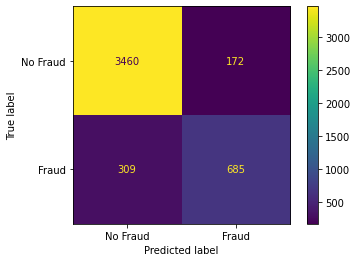

In [87]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test, 
                      values_format='d', 
                      display_labels=["No Fraud", "Fraud"])

# **Random Forest**

## **Trying with 100 trees and entropy criteria**

In [88]:
from sklearn.ensemble import RandomForestClassifier

X = data1.drop('OUTCOME', axis=1).copy()
y - data1['OUTCOME'].copy()
X.head()

,AGE,GENDER,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PolicyType,VehiclePrice,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,PastNumberOfClaims,NumberOfSuppliments
0,2,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,5,5,0.0,0.0,3,3
1,3,1,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,4,5,0.0,0.0,3,3
2,3,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,4,5,0.0,0.0,0,3
3,3,1,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,2,0,0.0,0.0,0,2
4,0,1,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,4,5,2.0,1.0,3,3


In [89]:
# train-test-split our data for Insurance Fraud Detection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [90]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (10794, 20)
X_test (4626, 20)
y_train (10794,)
y_test (4626,)


In [91]:
# Training RFC on training set
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [92]:
# Predicting the Test results
y_pred = classifier.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [93]:
# using confusion matrix to check the accuracy of RFC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3527  191]
 [ 286  622]]


In [94]:
accuracy_score(y_test, y_pred)

0.896887159533074

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      3718
         1.0       0.77      0.69      0.72       908

    accuracy                           0.90      4626
   macro avg       0.85      0.82      0.83      4626
weighted avg       0.89      0.90      0.89      4626



## **Trying with a different number of trees and gini criteria**

In [96]:
# Training RFC on training set
classifier = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [97]:
# Predicting the Test results
y_pred = classifier.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [98]:
accuracy_score(y_test, y_pred)

0.9001297016861219

There is really no much difference with more trees

## **Decision Tree**

In [99]:
from sklearn.tree import DecisionTreeClassifier

X = data1.drop('OUTCOME', axis=1).copy()
y - data1['OUTCOME'].copy()
X.head()

,AGE,GENDER,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PolicyType,VehiclePrice,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,PastNumberOfClaims,NumberOfSuppliments
0,2,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,5,5,0.0,0.0,3,3
1,3,1,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,4,5,0.0,0.0,3,3
2,3,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,4,5,0.0,0.0,0,3
3,3,1,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,2,0,0.0,0.0,0,2
4,0,1,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,4,5,2.0,1.0,3,3


In [100]:
# train-test-split our data for Insurance Fraud Detection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [101]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (10794, 20)
X_test (4626, 20)
y_train (10794,)
y_test (4626,)


In [102]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Model accuracy score with criterion entropy: 0.8671


[Text(0.5, 0.875, 'X[0] <= 2.5\nentropy = 0.734\nsamples = 10794\nvalue = [8569, 2225]'),
 Text(0.25, 0.625, 'X[7] <= 0.5\nentropy = 0.555\nsamples = 9391\nvalue = [8177, 1214]'),
 Text(0.125, 0.375, 'X[3] <= 0.5\nentropy = 0.987\nsamples = 1422\nvalue = [805, 617]'),
 Text(0.0625, 0.125, 'entropy = 0.462\nsamples = 307\nvalue = [277, 30]'),
 Text(0.1875, 0.125, 'entropy = 0.998\nsamples = 1115\nvalue = [528, 587]'),
 Text(0.375, 0.375, 'X[6] <= 0.074\nentropy = 0.384\nsamples = 7969\nvalue = [7372, 597]'),
 Text(0.3125, 0.125, 'entropy = 0.099\nsamples = 4213\nvalue = [4159, 54]'),
 Text(0.4375, 0.125, 'entropy = 0.596\nsamples = 3756\nvalue = [3213, 543]'),
 Text(0.75, 0.625, 'X[7] <= 0.5\nentropy = 0.855\nsamples = 1403\nvalue = [392, 1011]'),
 Text(0.625, 0.375, 'X[8] <= 0.5\nentropy = 0.524\nsamples = 711\nvalue = [84, 627]'),
 Text(0.5625, 0.125, 'entropy = 0.966\nsamples = 69\nvalue = [27, 42]'),
 Text(0.6875, 0.125, 'entropy = 0.432\nsamples = 642\nvalue = [57, 585]'),
 Text(0.

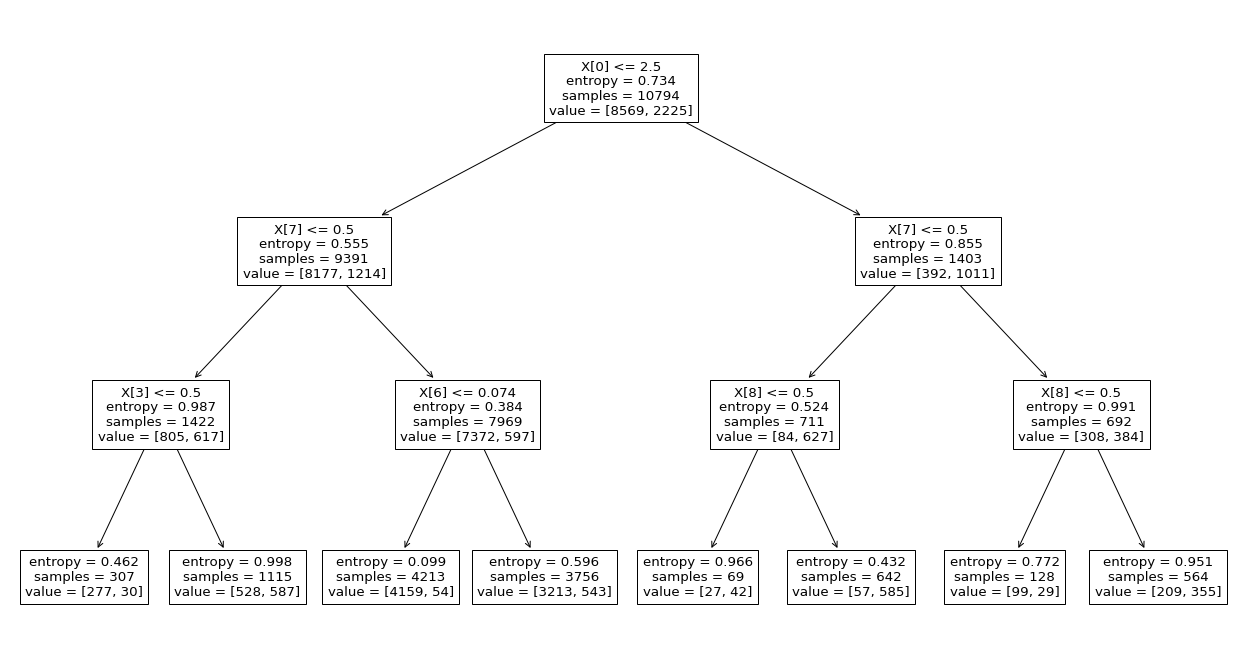

In [103]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(22,12))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3354  364]
 [ 251  657]]


In [105]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92      3718
         1.0       0.64      0.72      0.68       908

    accuracy                           0.87      4626
   macro avg       0.79      0.81      0.80      4626
weighted avg       0.87      0.87      0.87      4626



# **Naive bayes**

In [121]:
import numpy as np
from scipy.stats import skew, kurtosis

v = np.random.normal(size=100)

print(skew(v))
print(kurtosis(v))

-0.11414088836285234
0.24504759576668933


In [122]:
import numpy as np
from scipy.stats import normaltest

v = np.random.normal(size=100)

print(normaltest(v))

NormaltestResult(statistic=2.1871406102329036, pvalue=0.3350182385800756)


In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [107]:
X = data1.drop('OUTCOME', axis=1).copy()
y - data1['OUTCOME'].copy()
X.head()

,AGE,GENDER,Month,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,AgeOfVehicle,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,PolicyType,VehiclePrice,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,PastNumberOfClaims,NumberOfSuppliments
0,2,0,2,2,0,2,0.629027,1.0,0,1,0.0,1.0,10238.0,12000.0,5,5,0.0,0.0,3,3
1,3,1,4,2,1,1,0.357757,0.0,1,4,0.0,0.0,10238.0,16000.0,4,5,0.0,0.0,3,3
2,3,0,10,2,0,3,0.493146,1.0,1,5,0.0,0.0,10238.0,11000.0,4,5,0.0,0.0,0,3
3,3,1,6,2,2,3,0.206013,1.0,1,6,0.0,1.0,32765.0,11000.0,2,0,0.0,0.0,0,2
4,0,1,4,1,1,3,0.388366,1.0,1,3,0.0,0.0,32765.0,12000.0,4,5,2.0,1.0,3,3


In [108]:
# train-test-split our data for Insurance Fraud Detection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [109]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (10794, 20)
X_test (4626, 20)
y_train (10794,)
y_test (4626,)


In [110]:
# we are going to use the GaussianNB, this is used when the data distribution is normal
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [111]:
model.fit(X_train, y_train)

GaussianNB()

In [112]:
# now we check the accuracy score
model.score(X_test, y_test)

0.8551664504971898

In [113]:
y_test[:10]

15145    0.0
7050     1.0
1969     0.0
14436    0.0
11879    0.0
7566     0.0
3035     1.0
641      0.0
321      1.0
14770    0.0
Name: OUTCOME, dtype: float64

In [114]:
model.predict(X_test[:10])

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0.])

## **SVM**

In [115]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

# creating X and y
X = data1.drop('OUTCOME',axis=1)
y = data1['OUTCOME']

# train-test-split our data for Insurance Fraud Detection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
# The rbf assumes that the data are centered and scaled, which means each column have a mean value of 0 and a standard deviation of 1.
# So we need to scale both our training and testing set so that the rbf can work for the svm
X_train_scaled = scale(X_train)
X_test_scaled = scale (X_test)

In [116]:
# training the svm
clf_svm = SVC(random_state=42) # this makes an untrained shell of a Support vector classifier
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

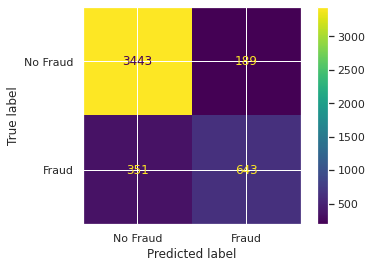

In [117]:
# now that we have trained the svm, let's see how well it performs on the Testing Dataset and draw a confusion matrix
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=["No Fraud", "Fraud"])

In the confusion matrix, we see that of the 3632 transactions that were not fraud, 189(5%) were correctly classified. And of the 994 transactions that are fraud, 643(65%) were correctly classified. So in other words, the SVM did not perform well. So we are going to try to improve the predictions using Cross validation to optimize the parameters.

## **Optimize Parameters with Cross Validation and GridSearchCV()**

Optimizing a SVM is all about finding the best value for gamma, and, potentially, the regularization parameter, C. So we are going to try to find the best parameters values using Cross validation.

In [118]:
# We specify a bunch of potential values for gamma and C, and GridSearchCV() tests all possible combinations of the parameters for us
param_grid = [
    {'C': [0.5, 1, 10, 100], # Note values of C must be > 0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]
# We are sticking to rbf because typically, it gives us the best performance and others will take time.
# We are also including C=1 and gamma='scale' as possible choices since they are the default values.

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


## **Building, Evaluating, Drawing, and interpreting the final SVM**

In [119]:
# Now that we have the ideal values for C and gamma, we can build the final SVM
clf_svm = SVC(random_state=42, C=10, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01, random_state=42)

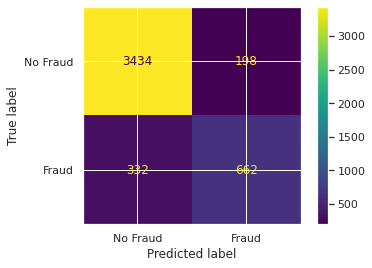

In [120]:
# Now we will draw another confusion matrix to see if the optimized SVM does better.
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format='d',
                      display_labels=["No Fraud", "Fraud"])

We can see that the results from the optimized SVM are just a little bit better than before. 9 more people were correctly classified as No fraud and 19 more transactions were incorrectly classified as fraud